# DAV 5400 Project 2 (M9)
### *Working with HTML, JSON, Web Scraping, and Web APIs*

## **Part I : Working with HTML and JSON**
>Pick three albums/CD’s from three different musical artists. For each album/CD, include the album title, the
name of the musical artist, a list of at least five of the songs/tracks that appear on the album/CD, and the year
in which the album/CD was released. Take the information that you’ve selected about these three albums, and
create two files using a text editor: one of which stores the albums’ information in HTML (using an html table)
and the other of which stores the albums’ information in JSON format (e.g. “albums.html” and
“albums.json”). Post the two files to your GitHub repository, and load them into your Jupyter Notebook from
your online repository. Then, write Python code, using your packages of choice, to load the information from
each of the two files you’ve created into separate PANDAS data frames. Are the two data frames identical? 


### Source: 
>github link of html file: [https://raw.githubusercontent.com/Nikkat-Afrin/DAV-5400/master/albums.html](https://raw.githubusercontent.com/Nikkat-Afrin/DAV-5400/master/albums.html)

>github link of json file: [https://raw.githubusercontent.com/Nikkat-Afrin/DAV-5400/master/albums.json](https://raw.githubusercontent.com/Nikkat-Afrin/DAV-5400/master/albums.json)

##### Approach For json file:
- There is not one universally applicable approach for converting JSON data into a Pandas data frame. However, there are some built-in functions that will work with specific types of JSON data.
- __import pandas lib__.
- __pd.read_json()__ can convert properly formatted JSON data into a Pandas dataframe. The function assumes each object in a JSON array is supposed to be a row within the Pandas data frame that it creates.


In [164]:
# load pandas
import pandas as pd
# reading an json file from Github raw link
json_data = pd.read_json('https://raw.githubusercontent.com/Nikkat-Afrin/DAV-5400/master/albums.json')
json_data

,Album_Title,Artist,Songs,Year
0,Thriller,Michael Joseph Jackson,"[The Girl Is Mine, Billie Jean, Beat It, Wan...",1983
1,Back in Black,AC/DC,"[If You Want Blood You've Got It, Let There Be...",1980
2,The Dark Side of the Moon,Pink Floyd,"[Speak to Me, Breathe, Don't be afraid to car...",1973


In [171]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Album_Title  3 non-null      object
 1   Artist       3 non-null      object
 2   Songs        3 non-null      object
 3   Year         3 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 228.0+ bytes


In [165]:
type(json_data)

pandas.core.frame.DataFrame

##### Approach For html file:
- Pandas provides the __read_html()__ function, which relies on components of the libraries listed above. 
- By default, __read_html()__ searches for __table__ tags within an HTML document and attempts to convert whatever it finds between two __tr ("table row"), td ("table data", or th ("table header")__ tags into a Pandas data frame 

In [167]:
# reading an HTML file from Github raw link
tables = pd.read_html('https://raw.githubusercontent.com/Nikkat-Afrin/DAV-5400/master/albums.html')
tables

[                 Album_Title                  Artist  \
 0                   Thriller  Michael Joseph Jackson   
 1              Back in Black                   AC/DC   
 2  The Dark Side of the Moon              Pink Floyd   
 
                                                Songs  Year  
 0  The Girl Is Mine Billie Jean  Beat It  Wanna B...  1983  
 1  If You Want Blood You've Got It  Let There Be ...  1980  
 2  Speak to Me Breathe  Don't be afraid to care  ...  1973  ]

In [168]:
type(tables)

list

`note:` As our table is in __list format__ so to convert into __pandas dataframe__ we are using __s=table[0]__
>__s = tables[0]__: After reading the HTML content and extracting tables, the code selects the first table from the list of tables extracted. In Python, list indexing starts from __0__, so __tables[0]__ refers to the first table. This extracted table is then assigned to the variable __s__.

In [169]:
html_data=tables[0]
html_data

,Album_Title,Artist,Songs,Year
0,Thriller,Michael Joseph Jackson,The Girl Is Mine Billie Jean Beat It Wanna B...,1983
1,Back in Black,AC/DC,If You Want Blood You've Got It Let There Be ...,1980
2,The Dark Side of the Moon,Pink Floyd,Speak to Me Breathe Don't be afraid to care ...,1973


In [172]:
html_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Album_Title  3 non-null      object
 1   Artist       3 non-null      object
 2   Songs        3 non-null      object
 3   Year         3 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 228.0+ bytes


#### Are the two data frames identical?
> - The two data frames are __initially__ __not idential__ because when we try to read the data from the json file using __read_json__ into the data frames and try to print it we get the output in the table format which is nothing but a dataframe.
> - when we try to read the data from the html file into the pandas data frame using __read_html()__ function and try to print then the output is in the form of __lists__. So we have to convert it into the dataframe explicitly and to do that i used __s=tables[0]__ so that the first table in the html file is selected.


In [173]:
json_data==html_data

,Album_Title,Artist,Songs,Year
0,True,True,False,True
1,True,True,False,True
2,True,True,False,True


- Even though we tried to equate from the pandas dataframe of the two files we can see that both of the data frames are not equal because in the __json_data__ the songs are represented into a list format and in the __html_data__ the songs are represented into a single string.

Hence, the two dataframes are not identical.

## **Part 2 :Scraping the Katz School’s “Staff” Web Page**
For Part II of Project 2 you will be using your web scraping skills to extract data from a Katz School web page. Specifically,
you will be extracting specific content from the Katz School’s “Staff” information page.
- From within your Python environment, access the web page containing the Katz School’s “Staff” information (https://www.yu.edu/katz/staff ) using whatever Python method you feel is most appropriate.
- Create a BeautifulSoup class to parse the page you have downloaded.
- Within the downloaded content of the web page, use your Python skills to locate the div with class=”text-only”, and assign the results to a variable named staff.
- Create a Pandas dataframe named staff_info having columns office, name, title, email, and phone. Each column should be capable of storing character strings.
- Within the HTML content stored within your staff variable, locate and extract each staff member’s name, title, email address (if provided), phone (if provided) and the name of the office to which they are assigned and save these items to your staff_info dataframe. Note that if either an email address or phone number is not provided for a staff member, your Python code should place the text string “N/A” within the corresponding dataframe column for that staff member. When finished you should have one dataframe row for each staff member listed on the Katz School’s “Staff” web page. Note that it is up to you to determine how to most effectively extract the individual data items for each staff member from the block of HTML data contained within your staff variable: You may use whatever HTML extraction and/or string processing methods (e.g., Python’s string manipulation functions; regular expressions, etc.) you believe are most appropriate.
> For example, for staff member Aaron Ross the valid data values for each of the items you are required to extract from the HTML page are as follows:
>- Office: Office of the Dean
>- Name: Aaron Ross
>- Title: Director of Strategic Initiatives and Deputy to the Dean
>- Email: aaron.ross2@yu.edu
>- Phone: 646-592-4148 <br><br>
>By contrast, for staff member Paul Russo, the valid data values for each of the items you are required to
extract from the HTML page are:<br>
>- Office: Office of the Dean
>- Name: Paul Russo
>- Title: Vice Provost and Dean
>- Email: N/A
>- Phone: N/A<br><br>

When finished, display the content of your dataframe within your Jupyter Notebook. Do your results appear to
accurately represent the content of the web page from which you extracted the dat

## Approach:

### Scrapping the web page
- The first thing we’ll need to do to scrape a web page is to download the page. We can download pages using the Python __requests library__.
- The __requests library__ will make a __GET__ request to a web server, which will download the HTML contents of a given web page for us.

Let’s try downloading Katz School web page, https://www.yu.edu/katz/staff 
- We’ll need to first download it using the __requests.get__ method.
- After running our request, we get a Response object. This object has a status_code property, which indicates if the page was downloaded successfully:
- A __status_code__ of __200__ means that the page downloaded successfully. 

In [4]:
# load the request module
import requests

# use the get() function to open and read the katz URL
page = requests.get("https://www.yu.edu/katz/staff")
page

<Response [200]>

> We can print out the HTML content of the page using the content property.

In [5]:
page.content

b'\n<!DOCTYPE html>\n<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">\n  <head>\n    <!-- Google Tag Manager -->\n    <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n                new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n            j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n            \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n        })(window,document,\'script\',\'dataLayer\',\'GTM-PSVTTKK\');</script>\n    <!-- End Google Tag Manager -->\n    <!-- Start People Grove Cards -->\n    <script src="https://

### Parsing a page with BeautifulSoup
- import the BeautifulSoup library, and create an instance of the BeautifulSoup class to parse our web page.
- __from bs4 import BeautifulSoup__: This line imports the BeautifulSoup class from the bs4 module.
- __soup = BeautifulSoup(page.content, 'html.parser')__: This line creates a BeautifulSoup object named soup. 
- __page.content__:page.content returns the raw HTML content of the web page.
- __'html.parser'__ : The built-in 'html.parser' is a parser provided by Python's standard library for parsing HTML.

In [6]:
# load the BeautifulSoup class from bs4 module.
from bs4 import BeautifulSoup

# BeautifulSouy() is then used to parse the web page
soup = BeautifulSoup(page.content, 'html.parser')

#### Finding all instances of a tag at once:
- If we want to extract a div tag, we can use the find_all method, which will find all the instances of a tag on a page.
- __soup__: This refers to the BeautifulSoup object that was created earlier. It represents the parsed HTML content of the web page.
- __.find_all()__: This is a method provided by BeautifulSoup that searches for all elements in the HTML document that match the specified criteria.
- __'div'__: This specifies the HTML tag name to search for. In this case, it's looking for __div__ elements.
- __class___="text-only": This specifies the CSS class name to search for within the __div__ elements. It looks for __div__ elements that have the CSS class __text-only__.

In [224]:
type(soup.find_all('div',class_="text-only")[0])

bs4.element.Tag

In [16]:
#changing the Tag element into string for the easy extraction of data.
str(soup.find_all('div',class_="text-only")[0])

'<div class="text-only">\n<div class="field field--name-field-paragraph-body"><h3>Office of the Dean\xa0</h3>\n<p>Paul Russo, Vice Provost and Dean\xa0<br/>\nProfessor of Data Science<br/><a href="/faculty/pages/russo-paul">Read Dr. Russo\'s Biography</a>\xa0</p>\n<p>Aaron Ross, Assistant Dean for Academic Programs and Deputy to the Dean\xa0<br/><a href="mailto:Aaron.Ross2@yu.edu">aaron.ross2@yu.edu</a> |\xa0646-592-4148 \xa0<br/>\n\xa0<br/>\nSofia Binioris, Director of Communications and Strategic Initiatives<br/><a href="mailto:Sofia.Binioris@yu.edu">sofia.binioris@yu.edu</a>\xa0| 645-592-4719</p>\n<p>Jackie Hamilton, Executive Director of Enrollment Management and Partnerships<br/><a href="mailto:jackie.hamilton@yu.edu">jackie.hamilton@yu.edu</a> | 646-787-6194</p>\n<p>Pamela Rodman, Director of Finance and Administration<br/><a href="mailto:pamela.rodman@yu.edu">pamela.rodman@yu.edu</a> | 646.592.4777</p>\n<p>Tabitha Collazo, Business and Operations Coordinator<br/><a href="mailto:

####  Replacing '\xa0':
- __.replace()__ is used to replace the `'\xa0'` with `' '` and it is stored in __staff__ variable. 

In [225]:
staff=str(soup.find_all('div',class_="text-only")[0]).replace('\xa0', ' ')
staff

'<div class="text-only">\n<div class="field field--name-field-paragraph-body"><h3>Office of the Dean </h3>\n<p>Paul Russo, Vice Provost and Dean <br/>\nProfessor of Data Science<br/><a href="/faculty/pages/russo-paul">Read Dr. Russo\'s Biography</a> </p>\n<p>Aaron Ross, Assistant Dean for Academic Programs and Deputy to the Dean <br/><a href="mailto:Aaron.Ross2@yu.edu">aaron.ross2@yu.edu</a> | 646-592-4148  <br/>\n <br/>\nSofia Binioris, Director of Communications and Strategic Initiatives<br/><a href="mailto:Sofia.Binioris@yu.edu">sofia.binioris@yu.edu</a> | 645-592-4719</p>\n<p>Jackie Hamilton, Executive Director of Enrollment Management and Partnerships<br/><a href="mailto:jackie.hamilton@yu.edu">jackie.hamilton@yu.edu</a> | 646-787-6194</p>\n<p>Pamela Rodman, Director of Finance and Administration<br/><a href="mailto:pamela.rodman@yu.edu">pamela.rodman@yu.edu</a> | 646.592.4777</p>\n<p>Tabitha Collazo, Business and Operations Coordinator<br/><a href="mailto:tabitha.collazo@yu.edu">

### Using Regular expressions for extracting of desired data values:

### Extracting information about the offices of the staff 

- Import the regular expression library, using __re__.
- Regular Expression Pattern: __"(?:h3>)([\w\s]+)(?:<\/h3>)"__
  >- __(?:h3>)__: This part of the pattern matches the literal string __h3>__ without capturing it.
  >- __([\w\s]+)__: __\w__ captures the group that matches one or more word characters and __\s__ captures the whitespace characters   
  >- __[ ]__+: pattern matches any sequence of one or more times inside the square brackets.
  >- __(?:<\/h3>)__: This part of the pattern matches the literal string __/h3>__ without capturing it.
- The regular expression __(?:h3>)([\w\s]+)(?:<\/h3>)__ is designed to extract the text between __h3>__ and __/h3>__ tags from the above string.  
- __re.findall()__ : re.findall() is a function that finds all the strings present inside the braces.
- This gives us all the offices from the web page.

`Note:` Here __<__ ,__h3>__ is not written together because it is a default markdown syntax for changing the font size.In the code below __h3__ is written between __<>__.


In [226]:
import re
office=re.findall("(?:<h3>)([\w\s]+)(?:<\/h3>)",staff)
office

['Office of the Dean ',
 'Graduate Admissions',
 'Graduate Student Life',
 'Academic Operations and Teaching and Learning']

### Extracting Names of the staff 

- __Regular Expression Pattern:__ __"(?:p>)([\w \"\-]+)(?=\,\s)|(?: <br\/>\\n <br\/>\\n)([\w\s]+)"__
  >- __(?:p>)__: This part of the pattern matches the literal string __(?:p>)__ without capturing it.
  >- __([\w \"\-]+)__: __\w__ captures the group that matches one or more word characters and __\"__ and __\-__ captures the __"__ and __-__ characters   
  >- __[ ]__+: pattern matches any sequence of one or more times inside the square brackets.
  >- __(?=\,\s)__: This part of the pattern matches the literal string __,__ and __white spaces__ without capturing it.
- The regular expression __(?:p>)([\w \"\-]+)(?=\,\s)__ is designed to extract the text between __p>__ and __, and white spaces__ from the above string.  
- `Note:` In this we are not able to extract the info of __Sofia Binioris__ and the reason behind it is her info was written inside the para tag of Aaron Ross. So for that purpose to extract her info i have written another regular expression and placed the __|__ operator.
- __(?: <br\/>\\n <br\/>\\n)([\w\s]+)__ : This expression basically extracts the word text(__\w__) and space(__\s__) present after the tags __<br\>\n__
- __re.findall()__ : re.findall() is a function that finds all the strings present inside the braces.
- This gives us all the Names from the web page.
- The list comprehension of group iterates over each group of matches returned by __re.findall()__ into a  single string using __"".join(group)__.
- The resulting list name contains the joined strings from each group of matches.

In [227]:
name=["".join(group) for group in re.findall("(?:<p>)([\w \"\-]+)(?=\,\s)|(?: <br\/>\\n <br\/>\\n)([\w\s]+)",staff)]
name

['Paul Russo',
 'Aaron Ross',
 'Sofia Binioris',
 'Jackie Hamilton',
 'Pamela Rodman',
 'Tabitha Collazo',
 'Ann Leary',
 'Jared Hakimi',
 'Xavier Velasquez',
 'Shayna Matzner',
 'Linyu Zheng',
 'Hyokyeong "Kyeong" Yu',
 'Aman Sharma',
 'Rafael Reyes',
 'John Vivolo',
 'Suzette Sadio',
 'Gladys Davis',
 'Shianne McLean',
 'Ariana Allias',
 'Lloyd Carew-Reid',
 'Denton Field']

### Extracting title of the staff 

- __Regular Expression Pattern:__ __"(?:p>[\w \"\-]+[\,\s]+)([\w\s\/\-]+)|(?:black\\\'\>)([\w\s\/\']+) |(?: <br\/>\\n <br\/>\\n[\w\s]+\, )([\w\s]+)"__
  >- __(?:p>[\w \"\-]+[\,\s]+)__: This part of the pattern matches the literal string __(?:p>)__, __words__, __white spaces__,and characters such as __",-__ without capturing it.
  >- __([\w\s\/\-]+)__: __\w__ captures the group that matches one or more word characters and __\/__ and __\-__ captures the __/__ and __-__ characters  and __\s__ captures white spaces.
  >- __[ ]__+: pattern matches any sequence of one or more times inside the square brackets.
  >- __(?:black\\\'\>)__:This part of the pattern matches the literal string __(?:black\\\'\)__ without capturing it.
  >- __([\w\s\/\']+)__: __\w__ captures the group that matches one or more word characters and __\/__ and __\'__ captures the __/__ and __'__ characters  and __\s__ captures white spaces..
- The regular expression __(?:p>[\w \"\-]+[\,\s]+)([\w\s\/\-]+)__ is designed to extract the text,spaces and characters such as `/` and `-` that comes after  __(?:p>[\w \"\-]+[\,\s]+)__ regex condition.
- `Note:` In this we are not able to extract the info of __Sofia Binioris__ and the reason behind it is her info was written inside the para tag of Aaron Ross. So for that purpose to extract her info i have written another regular expression and placed the __|__ operator.
- __(?: <br\/>\\n <br\/>\\n[\w\s]+\, )([\w\s]+)__ : This expression basically extracts the word text(__\w__) and space(__\s__) present after the tags __<br\/>\\n <br\/>\\n[\w\s]+\, __.
- `Note 2`: Here we used __(?:black\\\'\>)([\w\s\/\']+)__ because one of the title information is written in the style tag so for that purpose to extract that information a seperate regex is written. 
- __re.findall()__ : re.findall() is a function that finds all the strings present inside the braces.
- This gives us all the title from the web page.
- The list comprehension of group iterates over each group of matches returned by __re.findall()__ into a  single string using __"".join(group)__ and the condition __if "".join(group)!=' '__ filters out empty strings.
- The resulting list name contains the joined strings from each group of matches.

In [228]:
title=["".join(group) for group in re.findall("(?:<p>[\w \"\-]+[\,\s]+)([\w\s\/\-]+)|(?:black\\\'\>)([\w\s\/\']+) |(?: <br\/>\\n <br\/>\\n[\w\s]+\, )([\w\s]+)",staff) if "".join(group)!=' ' ]
title     

['Vice Provost and Dean ',
 'Assistant Dean for Academic Programs and Deputy to the Dean ',
 'Director of Communications and Strategic Initiatives',
 'Executive Director of Enrollment Management and Partnerships',
 'Director of Finance and Administration',
 'Business and Operations Coordinator',
 "Office Manager/Executive Assistant to the Dean's",
 'Director',
 'Associate Director of Graduate Admissions Operations',
 'Assistant Director',
 'Assistant Director',
 'International Student Advisor',
 'Recruitment Manager - South Asia',
 'Director of Graduate Student Life and Community Engagement',
 'Executive Director of Academic Operations and Teaching and Learning',
 'Academic Program Coordinator',
 'Program Manager',
 'Program Assistant',
 'Program Manager',
 'Instructional Designer',
 'Media Production Manager']

### Extracting Email Address of the staff 

- __Regular Expression Pattern:__ __"(?:">)([\w\@\.\-]+)(?:<\/a>)|(?:">)([\w\\\'\.\s]+)(?:<\/a>)"__
  >- __(?:">)__: This part of the pattern matches the literal string __(?:">)__ without capturing it.
  >- __([\w\@\.\-]+)__: __\w__ captures the group that matches one or more word characters and __\@__, __\.__ and __\-__ captures the __@__, __.__ and __-__ characters.
  >- __[ ]__+: pattern matches any sequence of one or more times inside the square brackets.
  >- __(?:<\/a>)__:This part of the pattern matches the literal string __(?:<\/a>)__ without capturing it.
  >- __(?:">)__:This part of the pattern matches the literal string __(?:">)__ without capturing it.
  >- __([\w\\\'\.\s]+)__: __\w__ captures the group that matches one or more word characters and __\\__, __\.__ and __\'__  captures the __\__, __,__, __.__ and __'__ characters  and __\s__ captures white spaces.
  >- __(?:<\/a>)__:This part of the pattern matches the literal string __(?:<\/a>)__ without capturing it.
- The regular expression __(?:">)([\w\@\.\-]+)(?:<\/a>)__ is designed to extract the text,and characters such as `@`,`.` and `-` that comes between  __(?:">)__ and __(?:<\/a>)__ regex condition.
- `Note:` In this we are using __|__ operator because we want the empty list where there is no information about the email of any particular staff.
- __(?:">)([\w\\\'\.\s]+)(?:<\/a>)"____ : This expression basically extracts the word text(__\w__),characters such as `\`,`.`and`'`  and space(__\s__) present between the tags __(?:">)__ and __(?:<\/a>)__.
- __re.findall()__ : re.findall() is a function that finds all the strings present inside the braces.
- This gives us all the email from the web page.
- The list comprehension of group iterates over each group of matches returned by __re.findall()__ into a  single string using __"".join(group)__.
- For each group, it extracts the first element __(group[0])__, which represents the email address.The condition __if group[1] != 'Schedule an Appointment'__ filters out matches where the second element of the group is 'Schedule an Appointment'.
- The resulting list __email__ contains the email addresses extracted from the content.

In [229]:
email=[group[0] for group in re.findall('(?:">)([\w\@\.\-]+)(?:<\/a>)|(?:">)([\w\\\'\.\s]+)(?:<\/a>)',staff) if group[1] != 'Schedule an Appointment']
email  

['',
 'aaron.ross2@yu.edu',
 'sofia.binioris@yu.edu',
 'jackie.hamilton@yu.edu',
 'pamela.rodman@yu.edu',
 'tabitha.collazo@yu.edu',
 'ann.leary@yu.edu',
 'jared.hakimi@yu.edu',
 'xavier.velasquez@yu.edu',
 'shayna.matzner@yu.edu',
 'linyu.zheng@yu.edu',
 'hyokyeong.yu@yu.edu',
 'aman.sharma@yu.edu',
 'rafael.reyes@yu.edu',
 'john.vivolo@yu.edu',
 'suzette.sadio@yu.edu',
 'gladys.davis@yu.edu',
 'shianne.mclean@yu.edu',
 'ariana.allias@yu.edu',
 'lloyd.carew-reid@yu.edu',
 'denton.field@yu.edu']

### Extracting Phone Numbers of the staff 

- __Regular Expression Pattern:__ __"'([\+91\s\-\.]*\d{3}[\-\. ]\d{3}[\-\. ]\d{4})'"__
  >- __[\+91\s\-\.]__: This part of the pattern matches zero or more occurrences of the characters __+__, __9__, __1__, whitespace characters ('\s'), __-__, or periods __.__, which may appear before the phone number.
  >- __\d{3}__: This part of the pattern matches exactly three digits.
  >- __[\-\. ]__ : This part of the pattern matches a __-__, __.__, or space character.
  >- __\d{4}__: This part of the pattern matches exactly four digits.
- __re.findall()__ : re.findall() is a function that finds all the strings present inside the braces.
- This gives us all the Phone Numbers from the web page.
- The list comprehension of group iterates over each group of matches returned by __re.findall()__.
- For each match, it removes leading and trailing whitespace characters using strip().
- The resulting list __phone__ contains the __Phone Numbers__ extracted from the content.

In [257]:
phone=[group.strip() for group in re.findall('([\+91\s\-\.]*\d{3}[\-\. ]\d{3}[\-\. ]\d{4})',staff) ]
phone 

['646-592-4148',
 '645-592-4719',
 '646-787-6194',
 '646.592.4777',
 '646-592-4735',
 '646-592-4724',
 '646-592-4722',
 '646-592-4737',
 '646-592-4726',
 '+1-332-271-5865',
 '646-592-4736',
 '+91 870 053 5893',
 '646-592-4729',
 '646-592-4743',
 '646-592-4762',
 '646-592-4034',
 '646-592-4768']

### Merging the different lists into a single list
- Here we are trying to join __Office__, __Emails__ and __Phone Numbers__ of the staff.
- __(?:h3>)([\w\s]+)(?:<\/h3>)__ This regex helps to extract the offices of the staff.
- __(?:">)([\w\@\.\-]+)(?:<\/a>)|(?:">)([\w\\\'\.\s]+)(?:<\/a>)__ This regex helps to extract the emails of the staff.
- __([\+91\s\-\.]*\d{3}[\-\. ]\d{3}[\-\. ]\d{4})__ This regex extracts the phone numbers of the staff.
- __re.findall()__ It finds out all the strings present in the regex condition. 

In [259]:
scrapped = re.findall('(?:<h3>)([\w\s]+)(?:<\/h3>)|(?:">)([\w\@\.\-]+)(?:<\/a>)|(?:">)([\w\\\'\.\s]+)(?:<\/a>)|([\+91\s\-\.]*\d{3}[\-\. ]\d{3}[\-\. ]\d{4})',staff) 
scrapped

[('Office of the Dean ', '', '', ''),
 ('', '', "Read Dr. Russo's Biography", ''),
 ('', 'aaron.ross2@yu.edu', '', ''),
 ('', '', '', ' 646-592-4148'),
 ('', 'sofia.binioris@yu.edu', '', ''),
 ('', '', '', ' 645-592-4719'),
 ('', 'jackie.hamilton@yu.edu', '', ''),
 ('', '', '', ' 646-787-6194'),
 ('', 'pamela.rodman@yu.edu', '', ''),
 ('', '', '', ' 646.592.4777'),
 ('', 'tabitha.collazo@yu.edu', '', ''),
 ('', '', '', ' 646-592-4735'),
 ('', 'ann.leary@yu.edu', '', ''),
 ('', '', '', ' 646-592-4724'),
 ('Graduate Admissions', '', '', ''),
 ('', 'jared.hakimi@yu.edu', '', ''),
 ('', '', '', ' 646-592-4722'),
 ('', '', 'Schedule an Appointment', ''),
 ('', 'xavier.velasquez@yu.edu', '', ''),
 ('', '', '', ' 646-592-4737'),
 ('', '', 'Schedule an Appointment', ''),
 ('', 'shayna.matzner@yu.edu', '', ''),
 ('', '', '', ' 646-592-4726'),
 ('', '', 'Schedule an Appointment', ''),
 ('', 'linyu.zheng@yu.edu', '', ''),
 ('', '', '', ' +1-332-271-5865'),
 ('', '', 'Schedule an Appointment', '')

As each of the inforamtion is spotted in completely different list, so to combine all the related inforamtion of a particular staff the following looping and condition statements can be used.
- The code iterates through the scrapped list to process its elements.
- Within the loop, it extracts office, email, and phone information from each group of three consecutive elements in the scrapped list.
- It checks if the first element of the current group is not an empty string, if its not empty the if block gets executed otherwise the loop takes place again.
- If a new record is detected, it constructs a list (row) containing the extracted information and appends it to the final_list.
- After appending the row to final_list, it resets the row list to prepare for the next iteration, ensuring clean separation of data records in final_list.

In [232]:
row =[]
final_list = []
#looping statements to iterate through every element
for i in range(len(scrapped)-3):
     #checking weather the element is empty or not
    if scrapped[i][0] != '':
        #assigning the value of the ith list's 0th element to the office
        office = scrapped[i][0] 
        #assigning the value of the 'i+1'th list's 1st element to the email
        email = scrapped[i+1][1] 
        #assigning the value of the 'i+2'th list's 3rd element to the phone
        phone = scrapped[i+2][3] 
        row.append(office)
        row.append(email)
        row.append(phone)
        final_list.append(row)
        row = []
    
    

In [233]:
final_list #checking the data inside the final list

[['Office of the Dean ', '', ''],
 ['Graduate Admissions', 'jared.hakimi@yu.edu', ' 646-592-4722'],
 ['Graduate Student Life', 'rafael.reyes@yu.edu', ' 646-592-4729'],
 ['Academic Operations and Teaching and Learning',
  'john.vivolo@yu.edu',
  ' 646-592-4743']]

As we are only able to get the information of only one staff memeber of each office so we are applying the if condition to email and phone numbers aslo.

In [234]:
row =[]
final_list = []
office = ''
email = ''
phone = ''
for i in range(len(scrapped)-3):
    if scrapped[i][0] != '':
        office = scrapped[i][0] 
    if scrapped[i+1][1] !='':
        email = scrapped[i+1][1]
    if scrapped[i+2][3] !='':
        phone = scrapped[i+2][3]
    row.append(office)
    row.append(email)
    row.append(phone)
    final_list.append(row)
    row = []
email = scrapped[len(scrapped)-1][1]
row.append(office)
row.append(email)
row.append(phone)
final_list.append(row)
    

In [235]:
final_list 

[['Office of the Dean ', '', ''],
 ['Office of the Dean ', 'aaron.ross2@yu.edu', ' 646-592-4148'],
 ['Office of the Dean ', 'aaron.ross2@yu.edu', ' 646-592-4148'],
 ['Office of the Dean ', 'sofia.binioris@yu.edu', ' 645-592-4719'],
 ['Office of the Dean ', 'sofia.binioris@yu.edu', ' 645-592-4719'],
 ['Office of the Dean ', 'jackie.hamilton@yu.edu', ' 646-787-6194'],
 ['Office of the Dean ', 'jackie.hamilton@yu.edu', ' 646-787-6194'],
 ['Office of the Dean ', 'pamela.rodman@yu.edu', ' 646.592.4777'],
 ['Office of the Dean ', 'pamela.rodman@yu.edu', ' 646.592.4777'],
 ['Office of the Dean ', 'tabitha.collazo@yu.edu', ' 646-592-4735'],
 ['Office of the Dean ', 'tabitha.collazo@yu.edu', ' 646-592-4735'],
 ['Office of the Dean ', 'ann.leary@yu.edu', ' 646-592-4724'],
 ['Office of the Dean ', 'ann.leary@yu.edu', ' 646-592-4724'],
 ['Office of the Dean ', 'ann.leary@yu.edu', ' 646-592-4724'],
 ['Graduate Admissions', 'jared.hakimi@yu.edu', ' 646-592-4722'],
 ['Graduate Admissions', 'jared.hak

#### __Getting distinct rows__
- Over here the inforamtion is repeated so to get the distinct rows, I'm running the following loop.
- __key = tuple(row)__ : Converts the current row  into a tuple. 
- __if key not in seen__: Checks if the key  is not already present in the seen dictionary. This indicates whether the current row is unique or a duplicate.
- __seen[key] = True__: Adds the key to the seen dictionary with a value of True to mark it as seen.
- __distinct_rows.append(row)__: Appends the row to the distinct_rows list, indicating that it is a unique row.

In [236]:
data = final_list
seen = {}
distinct_rows = []

for row in data:
    # Convert the row to a tuple to use as a key in the dictionary
    key = tuple(row)
    
    # Check if the row is not in the dictionary
    if key not in seen:
        # Add the row to the dictionary and append it to the result list
        seen[key] = True
        distinct_rows.append(row)


In [237]:
distinct_rows #looking into the distinct_rows

[['Office of the Dean ', '', ''],
 ['Office of the Dean ', 'aaron.ross2@yu.edu', ' 646-592-4148'],
 ['Office of the Dean ', 'sofia.binioris@yu.edu', ' 645-592-4719'],
 ['Office of the Dean ', 'jackie.hamilton@yu.edu', ' 646-787-6194'],
 ['Office of the Dean ', 'pamela.rodman@yu.edu', ' 646.592.4777'],
 ['Office of the Dean ', 'tabitha.collazo@yu.edu', ' 646-592-4735'],
 ['Office of the Dean ', 'ann.leary@yu.edu', ' 646-592-4724'],
 ['Graduate Admissions', 'jared.hakimi@yu.edu', ' 646-592-4722'],
 ['Graduate Admissions', 'xavier.velasquez@yu.edu', ' 646-592-4737'],
 ['Graduate Admissions', 'shayna.matzner@yu.edu', ' 646-592-4726'],
 ['Graduate Admissions', 'linyu.zheng@yu.edu', ' +1-332-271-5865'],
 ['Graduate Admissions', 'hyokyeong.yu@yu.edu', ' 646-592-4736'],
 ['Graduate Admissions', 'aman.sharma@yu.edu', ' +91 870 053 5893'],
 ['Graduate Student Life', 'rafael.reyes@yu.edu', ' 646-592-4729'],
 ['Academic Operations and Teaching and Learning',
  'john.vivolo@yu.edu',
  ' 646-592-474

#### __Removing incorrect data__
- In the previous code we are getting the emails and the phone numbers of the staff even though they are not present inside the web page so to correct them the following loop is executed.
- code iterates through each row in the distinct_rows list.
- __if row[1] == previous_email__: Compares the email (row[1]) of the current row with the previous_email.If the current email matches the previous_email, it means it's a duplicate.
- __row[1] = ""__: Sets the email of the current row to an empty string to mark it as a duplicate.
- If the email is different, it updates previous_email to the current email for future comparison.
- __if row[2] == previous_number__: Compares the phone number (row[2]) of the current row with the previous_number.If the current phone number matches the previous_number, it means it's a duplicate.
- __row[2] = ""__: Sets the phone number of the current row to an empty string to mark it as a duplicate.
- If the phone number is different, it updates previous_number to the current phone number for future comparison.
- After checking for duplicates and updating the email and phone number accordingly, the corrected row is appended to the corrected_data list.

In [238]:
previous_email = ""
previous_number = ""
corrected_data = []
for row in distinct_rows:
    if row[1] == previous_email:
        row[1] = ""
    else:
        previous_email = row[1]
    
    if row[2] == previous_number:
        row[2] = ""
    else:
        previous_number = row[2]
    corrected_data.append(row)

In [239]:
corrected_data #Looking into the corrected_data list

[['Office of the Dean ', '', ''],
 ['Office of the Dean ', 'aaron.ross2@yu.edu', ' 646-592-4148'],
 ['Office of the Dean ', 'sofia.binioris@yu.edu', ' 645-592-4719'],
 ['Office of the Dean ', 'jackie.hamilton@yu.edu', ' 646-787-6194'],
 ['Office of the Dean ', 'pamela.rodman@yu.edu', ' 646.592.4777'],
 ['Office of the Dean ', 'tabitha.collazo@yu.edu', ' 646-592-4735'],
 ['Office of the Dean ', 'ann.leary@yu.edu', ' 646-592-4724'],
 ['Graduate Admissions', 'jared.hakimi@yu.edu', ' 646-592-4722'],
 ['Graduate Admissions', 'xavier.velasquez@yu.edu', ' 646-592-4737'],
 ['Graduate Admissions', 'shayna.matzner@yu.edu', ' 646-592-4726'],
 ['Graduate Admissions', 'linyu.zheng@yu.edu', ' +1-332-271-5865'],
 ['Graduate Admissions', 'hyokyeong.yu@yu.edu', ' 646-592-4736'],
 ['Graduate Admissions', 'aman.sharma@yu.edu', ' +91 870 053 5893'],
 ['Graduate Student Life', 'rafael.reyes@yu.edu', ' 646-592-4729'],
 ['Academic Operations and Teaching and Learning',
  'john.vivolo@yu.edu',
  ' 646-592-474

In [240]:
len(corrected_data)

21

In [241]:
len(title )

21

In [242]:
len(name)

21

In [243]:
import pandas as pd

In [244]:
pd

<module 'pandas' from 'C:\\Users\\nikka\\anaconda3\\Lib\\site-packages\\pandas\\__init__.py'>

In [245]:
corrected_data[0]

['Office of the Dean ', '', '']

### __merging all data into one__
Let's merge all the lists into a single list to get all the data into one frame.
- __row = fresh_copy[i]__: Retrieves the __ith__ row from the __fresh_copy__ list and assigns it to the variable __row__.
- __row.append(name[i])__: Appends the name corresponding to the current index __i__ from the __name list__ to the __row__.
- __row.append(title[i])__: Appends the title corresponding to the current index __i__ from the __title list__ to the __row__.
- After appending the name and title to the row, the modified row is appended to the __data list__.

In [246]:
data = []
fresh_copy = corrected_data.copy()
for i in range(len(fresh_copy)):
    row = fresh_copy[i]
    row.append(name[i])
    row.append(title[i])
    data.append(row)
data

[['Office of the Dean ', '', '', 'Paul Russo', 'Vice Provost and Dean '],
 ['Office of the Dean ',
  'aaron.ross2@yu.edu',
  ' 646-592-4148',
  'Aaron Ross',
  'Assistant Dean for Academic Programs and Deputy to the Dean '],
 ['Office of the Dean ',
  'sofia.binioris@yu.edu',
  ' 645-592-4719',
  'Sofia Binioris',
  'Director of Communications and Strategic Initiatives'],
 ['Office of the Dean ',
  'jackie.hamilton@yu.edu',
  ' 646-787-6194',
  'Jackie Hamilton',
  'Executive Director of Enrollment Management and Partnerships'],
 ['Office of the Dean ',
  'pamela.rodman@yu.edu',
  ' 646.592.4777',
  'Pamela Rodman',
  'Director of Finance and Administration'],
 ['Office of the Dean ',
  'tabitha.collazo@yu.edu',
  ' 646-592-4735',
  'Tabitha Collazo',
  'Business and Operations Coordinator'],
 ['Office of the Dean ',
  'ann.leary@yu.edu',
  ' 646-592-4724',
  'Ann Leary',
  "Office Manager/Executive Assistant to the Dean's"],
 ['Graduate Admissions',
  'jared.hakimi@yu.edu',
  ' 646-59

### __Creating a DataFrame__
 __staff_info__ is the pandas DataFrame with the coloumns __Office__, __Email__, __Phone__, __Name__ and __Title__

In [260]:
# Create a DataFrame
staff_info = pd.DataFrame(data, columns=['Office', 'Email', 'Phone','Name','Title'])
staff_info

,Office,Email,Phone,Name,Title
0,Office of the Dean,,,Paul Russo,Vice Provost and Dean
1,Office of the Dean,aaron.ross2@yu.edu,646-592-4148,Aaron Ross,Assistant Dean for Academic Programs and Deput...
2,Office of the Dean,sofia.binioris@yu.edu,645-592-4719,Sofia Binioris,Director of Communications and Strategic Initi...
3,Office of the Dean,jackie.hamilton@yu.edu,646-787-6194,Jackie Hamilton,Executive Director of Enrollment Management an...
4,Office of the Dean,pamela.rodman@yu.edu,646.592.4777,Pamela Rodman,Director of Finance and Administration
5,Office of the Dean,tabitha.collazo@yu.edu,646-592-4735,Tabitha Collazo,Business and Operations Coordinator
6,Office of the Dean,ann.leary@yu.edu,646-592-4724,Ann Leary,Office Manager/Executive Assistant to the Dean's
7,Graduate Admissions,jared.hakimi@yu.edu,646-592-4722,Jared Hakimi,Director
8,Graduate Admissions,xavier.velasquez@yu.edu,646-592-4737,Xavier Velasquez,Associate Director of Graduate Admissions Oper...
9,Graduate Admissions,shayna.matzner@yu.edu,646-592-4726,Shayna Matzner,Assistant Director


### Replacing empty strings with __N/A__
- To replace the empty strings with N/A, __.replace()__ Function is used.
- And columns that are being replaced are __Email__ and __Phone__.


In [262]:
columns_to_replace = ['Email', 'Phone']
staff_info[columns_to_replace] = staff_info[columns_to_replace].replace('', 'N/A')
staff_info

,Office,Email,Phone,Name,Title
0,Office of the Dean,N/A,N/A,Paul Russo,Vice Provost and Dean
1,Office of the Dean,aaron.ross2@yu.edu,646-592-4148,Aaron Ross,Assistant Dean for Academic Programs and Deput...
2,Office of the Dean,sofia.binioris@yu.edu,645-592-4719,Sofia Binioris,Director of Communications and Strategic Initi...
3,Office of the Dean,jackie.hamilton@yu.edu,646-787-6194,Jackie Hamilton,Executive Director of Enrollment Management an...
4,Office of the Dean,pamela.rodman@yu.edu,646.592.4777,Pamela Rodman,Director of Finance and Administration
5,Office of the Dean,tabitha.collazo@yu.edu,646-592-4735,Tabitha Collazo,Business and Operations Coordinator
6,Office of the Dean,ann.leary@yu.edu,646-592-4724,Ann Leary,Office Manager/Executive Assistant to the Dean's
7,Graduate Admissions,jared.hakimi@yu.edu,646-592-4722,Jared Hakimi,Director
8,Graduate Admissions,xavier.velasquez@yu.edu,646-592-4737,Xavier Velasquez,Associate Director of Graduate Admissions Oper...
9,Graduate Admissions,shayna.matzner@yu.edu,646-592-4726,Shayna Matzner,Assistant Director


### Results:
To extract a particular row of the dataframe ___info.loc[ ]___ Fucntion is used. 

In [263]:
#Extracting the 0th index of the DataFrame.
staff_info.loc[0] 

Office       Office of the Dean 
Email                        N/A
Phone                        N/A
Name                  Paul Russo
Title     Vice Provost and Dean 
Name: 0, dtype: object

In [264]:
#Extracting the 1st index of the DataFrame.
staff_info.loc[1]

Office                                  Office of the Dean 
Email                                    aaron.ross2@yu.edu
Phone                                          646-592-4148
Name                                             Aaron Ross
Title     Assistant Dean for Academic Programs and Deput...
Name: 1, dtype: object

In [265]:
#Extracting the 17th index of the DataFrame.
staff_info.loc[17]

Office    Academic Operations and Teaching and Learning
Email                             shianne.mclean@yu.edu
Phone                                               N/A
Name                                     Shianne McLean
Title                                 Program Assistant
Name: 17, dtype: object

In [266]:
#Extracting the 19th index of the DataFrame.
staff_info.loc[19]

Office    Academic Operations and Teaching and Learning
Email                           lloyd.carew-reid@yu.edu
Phone                                      646-592-4768
Name                                   Lloyd Carew-Reid
Title                            Instructional Designer
Name: 19, dtype: object

### Conclusion: 
#### The results appear to accurately represent the content of the web page. 

## **Part III : Working with Web API’s**
>The newsdata.io web site provides a rich set of APIs for accessing both live breaking news and historical news,
as described here: https://newsdata.io/<br>
You’ll need to start by signing up for an API key.<br>
Your task is to then choose one of the two newsdata.io APIs (i.e., ‘Live Breaking News’ or ‘Historical news’)
and construct an interface in Python to read JSON data accessible via the API and transform that data into a
Pandas data frame that is suitable for use in data analysis work. Once you’ve captured the data you are
interested in, do some basic analysis of your choosing using the content of your dataframe and provide a
written narrative within formatted Markdown cells explaining the results of your analysis.

## Working with Web API’s: Extraction

Over here I used the __latest news URl__ that is __`https://newsdata.io/api/1/news?`__, my request query is __`&q=Global%20Warming`__ and the apikey is __`apikey=pub_4017089b9b2f17af7a1f6a22bdd46700d6f10`__


#### URL: [https://newsdata.io/api/1/news?apikey=pub_4017089b9b2f17af7a1f6a22bdd46700d6f10&q=Global%20Warming](https://newsdata.io/api/1/news?apikey=pub_4017089b9b2f17af7a1f6a22bdd46700d6f10&q=Global%20Warming)



### The requests library

- __requests module__ allows Python code to send HTTP requests to web servers and handle the responses.

-  The requests.get() function is used to send a GET request to the URL specified as its argument.
- In this case, the URL is __'https://newsdata.io/api/1/news?apikey=pub_4017089b9b2f17af7a1f6a22bdd46700d6f10&q=Global%20Warming'__. This URL points to the Newsdata.io API endpoint for retrieving news articles related to "Global Warming". The API key pub_4017089b9b2f17af7a1f6a22bdd46700d6f10 is provided as a query parameter.

-  The response object returned by __requests.get()__ is stored in the variable __r__.

- The __.text__ attribute of the response object r is used to extract the textual content of the response, which typically contains the data returned by the API.

-  The extracted text content is stored in the variable __obj__ for further processing or analysis.

In [42]:
import requests

r = requests.get('https://newsdata.io/api/1/news?apikey=pub_4017089b9b2f17af7a1f6a22bdd46700d6f10&q=Global%20Warming')
obj= r.text
obj

'{"status":"success","totalResults":301,"results":[{"article_id":"a820006d1ff770a4ba2ae3ecb2590d79","title":"I built a treehouse & listed it on Airbnb – now I rake in £300 a night & quit my job & it’s been the top world listing","link":"https://www.the-sun.com/lifestyle/10805304/treehouse-fun-airbnb-quit-job-top-listing/","keywords":["lifestyle","real life","airbnb","home transformations","homes","house prices","jobs","money saving"],"creator":["Becky Pemberton"],"video_url":null,"description":null,"content":"ONLY AVAILABLE IN PAID PLANS","pubDate":"2024-03-16 12:45:58","image_url":"https://www.thesun.co.uk/wp-content/uploads/2024/03/300-night-i-ve-quit-887496490.jpg?strip=all&w=960","source_id":"thesun","source_url":"https://www.thesun.co.uk","source_icon":"https://i.bytvi.com/domain_icons/thesun.png","source_priority":1813,"country":["united states of america"],"category":["top"],"language":"english","ai_tag":"ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE PLANS","sentiment":"ONLY AVAI

In [43]:
# import the json library
import json

__result = json.loads(obj)__ line calls the loads() function from the json module. The loads() function takes a JSON string (obj) as input and converts it into a Python object. The resulting Python object is stored in the variable result.

In [44]:
# convert a json string into a Python object using the json.loads() function
result = json.loads(obj)
result

{'status': 'success',
 'totalResults': 301,
 'results': [{'article_id': 'a820006d1ff770a4ba2ae3ecb2590d79',
   'title': 'I built a treehouse & listed it on Airbnb – now I rake in £300 a night & quit my job & it’s been the top world listing',
   'link': 'https://www.the-sun.com/lifestyle/10805304/treehouse-fun-airbnb-quit-job-top-listing/',
   'keywords': ['lifestyle',
    'real life',
    'airbnb',
    'home transformations',
    'homes',
    'house prices',
    'jobs',
    'money saving'],
   'creator': ['Becky Pemberton'],
   'video_url': None,
   'description': None,
   'content': 'ONLY AVAILABLE IN PAID PLANS',
   'pubDate': '2024-03-16 12:45:58',
   'image_url': 'https://www.thesun.co.uk/wp-content/uploads/2024/03/300-night-i-ve-quit-887496490.jpg?strip=all&w=960',
   'source_id': 'thesun',
   'source_url': 'https://www.thesun.co.uk',
   'source_icon': 'https://i.bytvi.com/domain_icons/thesun.png',
   'source_priority': 1813,
   'country': ['united states of america'],
   'categor

- __result__ is the Python object obtained after parsing the JSON string.
- __["results"]__ is used to access the value associated with the key __results__ in the Python dictionary stored in the __result variable__.

In [45]:
result["results"]

[{'article_id': 'a820006d1ff770a4ba2ae3ecb2590d79',
  'title': 'I built a treehouse & listed it on Airbnb – now I rake in £300 a night & quit my job & it’s been the top world listing',
  'link': 'https://www.the-sun.com/lifestyle/10805304/treehouse-fun-airbnb-quit-job-top-listing/',
  'keywords': ['lifestyle',
   'real life',
   'airbnb',
   'home transformations',
   'homes',
   'house prices',
   'jobs',
   'money saving'],
  'creator': ['Becky Pemberton'],
  'video_url': None,
  'description': None,
  'content': 'ONLY AVAILABLE IN PAID PLANS',
  'pubDate': '2024-03-16 12:45:58',
  'image_url': 'https://www.thesun.co.uk/wp-content/uploads/2024/03/300-night-i-ve-quit-887496490.jpg?strip=all&w=960',
  'source_id': 'thesun',
  'source_url': 'https://www.thesun.co.uk',
  'source_icon': 'https://i.bytvi.com/domain_icons/thesun.png',
  'source_priority': 1813,
  'country': ['united states of america'],
  'category': ['top'],
  'language': 'english',
  'ai_tag': 'ONLY AVAILABLE IN PROFESSIO

###  Exporting JSON data into pandas DataFrame:

- __import pandas as pd__ imports the pandas library and aliases it as pd.
- __results = pd.DataFrame(result['results'])__ T creates a DataFrame named results using the data obtained from the JSON object result['results']. 
- __results__ displays the results DataFrame. 

In [46]:
import pandas as pd

# Create a DataFrame named 'results' using the data obtained from the JSON object 'result['results']'
results = pd.DataFrame(result['results'])

# Display the 'results' DataFrame
results

,article_id,title,link,keywords,creator,video_url,description,content,pubDate,image_url,...,source_url,source_icon,source_priority,country,category,language,ai_tag,sentiment,sentiment_stats,ai_region
0,a820006d1ff770a4ba2ae3ecb2590d79,I built a treehouse & listed it on Airbnb – no...,https://www.the-sun.com/lifestyle/10805304/tre...,"[lifestyle, real life, airbnb, home transforma...",[Becky Pemberton],None,None,ONLY AVAILABLE IN PAID PLANS,2024-03-16 12:45:58,https://www.thesun.co.uk/wp-content/uploads/20...,...,https://www.thesun.co.uk,https://i.bytvi.com/domain_icons/thesun.png,1813,[united states of america],[top],english,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN CORPORATE PLANS
1,d19e81faccbef5bebf84c89f59d89909,I built a treehouse & listed it on Airbnb – no...,https://www.thesun.co.uk/fabulous/26732831/tre...,"[fabulous, real life, airbnb, home transformat...",[Becky Pemberton],None,None,ONLY AVAILABLE IN PAID PLANS,2024-03-16 12:45:58,https://www.thesun.co.uk/wp-content/uploads/20...,...,https://www.thesun.co.uk,https://i.bytvi.com/domain_icons/thesun.png,1813,[united kingdom],[top],english,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN CORPORATE PLANS
2,550ea421558812e100591442e771567a,I built a treehouse & listed it on Airbnb – no...,https://www.thesun.ie/fabulous/12544205/treeho...,"[fabulous, real life, airbnb, home transformat...",[Becky Pemberton],None,None,ONLY AVAILABLE IN PAID PLANS,2024-03-16 12:45:58,https://www.thesun.co.uk/wp-content/uploads/20...,...,https://www.thesun.ie,https://i.bytvi.com/domain_icons/thesun_ie.png,45285,[ireland],[entertainment],english,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN CORPORATE PLANS
3,4366dfe9d9ff7fa0129848b01205d101,Dermatologists raise concerns about skin disea...,http://www.adaderana.lk/news.php?nid=97996,None,None,None,Dermatologists have raised concerns about risk...,ONLY AVAILABLE IN PAID PLANS,2024-03-16 12:07:47,https://adaderanaenglish.s3.amazonaws.com/1710...,...,https://www.adaderana.lk,https://i.bytvi.com/domain_icons/adaderana.png,223286,[sri lanka],[top],english,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN CORPORATE PLANS
4,33376683595cba38ef1d51c954d6b8e0,"In Paris, the Olympics Clean Up Their Act",https://www.nytimes.com/2024/03/16/climate/par...,"[global warming, greenhouse gas emissions, ath...",[Somini Sengupta and Catherine Porter],None,Organizers of the Games promise to slash green...,ONLY AVAILABLE IN PAID PLANS,2024-03-16 11:35:05,https://static01.nyt.com/images/2024/03/15/mul...,...,http://www.nytimes.com,https://i.bytvi.com/domain_icons/nytimes.png,27,[united states of america],[environment],english,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN CORPORATE PLANS
5,99225f3d589fd67b1107069d91ea4128,Ninh Binh - A popular springtime rendezvous point,https://en.vietnamplus.vn/ninh-binh-a-popular-...,None,None,None,Spring is the peak season for Ninh Binh’s tour...,ONLY AVAILABLE IN PAID PLANS,2024-03-16 11:22:59,None,...,https://www.vietnamplus.vn,None,248784,[vietnam],[top],english,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN PROFESSIONAL AND CORPORATE P...,ONLY AVAILABLE IN CORPORATE PLANS
6,8222c9ff9baf1533030e80322eae86ca,Can we Curtail the Bhutanese Exodus for Higher...,https://kuenselonline.com/can-we-curtail-the-b...,[opinions],[kuensel1],None,"In recent years, there has bee

##  Working with Web API’s: Analysis

In [109]:
# displaying the column names of the DataFrame 'results'
results.columns 

Index(['article_id', 'title', 'link', 'keywords', 'creator', 'video_url',
       'description', 'content', 'pubDate', 'image_url', 'source_id',
       'source_url', 'source_icon', 'source_priority', 'country', 'category',
       'language', 'ai_tag', 'sentiment', 'sentiment_stats', 'ai_region'],
      dtype='object')

#### Keyword Frequency Analysis

In [48]:
# Displays number of rows in the DataFrame
len(results)

10

In [50]:
# Displays summary information about the DataFrame 
results.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       10 non-null     object
 1   title            10 non-null     object
 2   link             10 non-null     object
 3   keywords         7 non-null      object
 4   creator          7 non-null      object
 5   video_url        0 non-null      object
 6   description      7 non-null      object
 7   content          10 non-null     object
 8   pubDate          10 non-null     object
 9   image_url        8 non-null      object
 10  source_id        10 non-null     object
 11  source_url       10 non-null     object
 12  source_icon      8 non-null      object
 13  source_priority  10 non-null     int64 
 14  country          10 non-null     object
 15  category         10 non-null     object
 16  language         10 non-null     object
 17  ai_tag           10 non-null     objec

__results.describe()__ This method computes descriptive statistics for numerical columns in the DataFrame __results__. 

In [51]:
results.describe()

,source_priority
count,1.000000e+01
mean,5.985937e+05
std,1.457496e+06
min,2.700000e+01
25%,1.813000e+03
50%,2.742000e+04
75%,2.424095e+05
max,4.690848e+06


### Analyzing Source Priority column:

- __results["source_priority"]__ Accesses the 'source_priority' column in the DataFrame 'results'.
- __.max()__ Finds the maximum value in the 'source_priority' column.
- __results[results["source_priority"]==results["source_priority"].max()]__ tells the DataFrame 'results' to include only rows where the 'source_priority' column equals the maximum value found earlier.

In [53]:
print(results[results["source_priority"]==results["source_priority"].max()])

                         article_id  \
9  05184d0fe5bc6eaebe8f0bedce91b01a   

                                               title  \
9  Quando non sai se salvare il mondo da una apoc...   

                                                link  \
9  https://scenarieconomici.it/quando-non-sai-se-...   

                                            keywords creator video_url  \
9  [attualità, guerra atomica, macron, putin, ris...    None      None   

                                         description  \
9  Warning! Articolo complottista, astenersi benp...   

                        content              pubDate  \
9  ONLY AVAILABLE IN PAID PLANS  2024-03-16 10:36:42   

                                           image_url  ...  \
9  https://scenarieconomici.it/wp-content/uploads...  ...   

                    source_url  \
9  https://scenarieconomici.it   

                                         source_icon source_priority  country  \
9  https://i.bytvi.com/domain_icons/scenariecon

#### By looking at the above we can clearly see that we cannot work with a few columns as they do not come in free version, we can also verify this using the frequency of the columns

### Collecting the columns that cannot be analyzed:

- __results.select_dtypes(include='object').columns__ Selects columns of the DataFrame 'results' with data type 'object'.
- __results[column].describe()["unique"]__ Retrieves the number of unique values for each column using the describe() method and accessing the "unique".
- __if results[column].describe()["unique"] < 3__ Checks if the number of unique values in each selected column is less than 3.
- __{column: results[column].describe()}__ Creates a dictionary where the keys are column names and the values are the result of the describe() method .
- __useless_columns.keys()__ Returns the keys that is the column names of the dictionary, which represent the columns with a low number of unique values.

In [58]:
useless_columns = {column:results[column].describe() for column in results.select_dtypes(include='object').columns if results[column].describe()["unique"] < 3}
useless_columns.keys()

dict_keys(['video_url', 'content', 'language', 'ai_tag', 'sentiment', 'sentiment_stats', 'ai_region'])

### Dropping the columns that cannot be analyzed:

- __results.drop([*useless_columns.keys()], axis=1__ Drops columns from the DataFrame __results__ based on the keys which is nothing but the column names obtained from the __useless_columns__ dictionary.
- __[*useless_columns.keys()]__: Unpacks the keys of the __useless_columns__ dictionary into a list of column names.
- __axis=1__ Specifies that the operation should be performed along columns.

In [61]:
news_df = results.drop([*useless_columns.keys()], axis=1)
news_df

,article_id,title,link,keywords,creator,description,pubDate,image_url,source_id,source_url,source_icon,source_priority,country,category
0,a820006d1ff770a4ba2ae3ecb2590d79,I built a treehouse & listed it on Airbnb – no...,https://www.the-sun.com/lifestyle/10805304/tre...,"[lifestyle, real life, airbnb, home transforma...",[Becky Pemberton],None,2024-03-16 12:45:58,https://www.thesun.co.uk/wp-content/uploads/20...,thesun,https://www.thesun.co.uk,https://i.bytvi.com/domain_icons/thesun.png,1813,[united states of america],[top]
1,d19e81faccbef5bebf84c89f59d89909,I built a treehouse & listed it on Airbnb – no...,https://www.thesun.co.uk/fabulous/26732831/tre...,"[fabulous, real life, airbnb, home transformat...",[Becky Pemberton],None,2024-03-16 12:45:58,https://www.thesun.co.uk/wp-content/uploads/20...,thesun,https://www.thesun.co.uk,https://i.bytvi.com/domain_icons/thesun.png,1813,[united kingdom],[top]
2,550ea421558812e100591442e771567a,I built a treehouse & listed it on Airbnb – no...,https://www.thesun.ie/fabulous/12544205/treeho...,"[fabulous, real life, airbnb, home transformat...",[Becky Pemberton],None,2024-03-16 12:45:58,https://www.thesun.co.uk/wp-content/uploads/20...,thesun_ie,https://www.thesun.ie,https://i.bytvi.com/domain_icons/thesun_ie.png,45285,[ireland],[entertainment]
3,4366dfe9d9ff7fa0129848b01205d101,Dermatologists raise concerns about skin disea...,http://www.adaderana.lk/news.php?nid=97996,None,None,Dermatologists have raised concerns about risk...,2024-03-16 12:07:47,https://adaderanaenglish.s3.amazonaws.com/1710...,adaderana,https://www.adaderana.lk,https://i.bytvi.com/domain_icons/adaderana.png,223286,[sri lanka],[top]
4,33376683595cba38ef1d51c954d6b8e0,"In Paris, the Olympics Clean Up Their Act",https://www.nytimes.com/2024/03/16/climate/par...,"[global warming, greenhouse gas emissions, ath...",[Somini Sengupta and Catherine Porter],Organizers of the Games promise to slash green...,2024-03-16 11:35:05,https://static01.nyt.com/images/2024/03/15/mul...,nytimes,http://www.nytimes.com,https://i.bytvi.com/domain_icons/nytimes.png,27,[united states of america],[environment]
5,99225f3d589fd67b1107069d91ea4128,Ninh Binh - A popular springtime rendezvous point,https://en.vietnamplus.vn/ninh-binh-a-popular-...,None,None,Spring is the peak season for Ninh Binh’s tour...,2024-03-16 11:22:59,None,vietnamplus,https://www.vietnamplus.vn,None,248784,[vietnam],[top]
6,8222c9ff9baf1533030e80322eae86ca,Can we Curtail the Bhutanese Exodus for Higher...,https://kuenselonline.com/can-we-curtail-the-b...,[opinions],[kuensel1],"In recent years, there has been sudden euphori...",2024-03-16 11:00:26,None,kuenselonline,https://kuenselonline.com,None,764094,[bhutan],[business]
7,b18f3d8e61eb0c6bec2aef26c5e9223a,How human-rights court challenges are moving t...,https://www.thestar.com/news/world/how-human-r...,None,"[Akshat Rathi, Excerpt from Climate Capitalism]",Cases in Netherlands and Germany are examples ...,2024-03-16 11:00:00,https://bloximages.chicago2.vip.townnews.com/t...,thestar,https://www.thestar.com,https://i.bytvi.com/domain_icons/thestar.png,9555,[canada],[world]
8,5d46d8de873afa00b4b017faad255673,Why Massive Numbers of Farmed Salmon Are Dying,https://time.com/6957610/farmed-salmon-dying/,"[uncategorized, freelance, sustainability]",[Douglas Frantz and Catherine Collins],Mass die-offs of farmed salmon show the deep p...,2024-03-16 11:00:00,https://api.time.com/wp-content/uploads/2024/0...,time,https://time.com,https://i.bytvi.com/domain_icons/time.png,432,[united states of america],[health]
9,05184d0fe5bc6eaebe8f0bedce91b01a,Quando non sai se salvare il mondo da una apoc...,https://scenarieconomici.it/quando-non-sai-se-...,"[attualità, guerra atomica, macron, putin, ris...",None,"Warning! Articolo complottista, astenersi benp...",2024-03-16 10:36:42,https://scenarieconomici.it/wp-content/uploads...,scenarieconomici,https://scenarieconomici.it,https://i.bytvi.com/domain_icons/scenarieconom...,4690848,[italy],[top]


#### We can't make use of article id so dropping that column.

- __news_df.columns[0]__ Accesses the first column of the DataFrame 'news_df'.
- __news_df.drop([news_df.columns[0]], axis=1)__ Drops the column specified by its index that is the first column from the DataFrame 'news_df'.
- __axis=1__ Specifies that the operation should be performed along columns.

In [62]:
news_df = news_df.drop([news_df.columns[0]], axis=1)

In [63]:
#Displays news_df DataFrame
news_df

,title,link,keywords,creator,description,pubDate,image_url,source_id,source_url,source_icon,source_priority,country,category
0,I built a treehouse & listed it on Airbnb – no...,https://www.the-sun.com/lifestyle/10805304/tre...,"[lifestyle, real life, airbnb, home transforma...",[Becky Pemberton],None,2024-03-16 12:45:58,https://www.thesun.co.uk/wp-content/uploads/20...,thesun,https://www.thesun.co.uk,https://i.bytvi.com/domain_icons/thesun.png,1813,[united states of america],[top]
1,I built a treehouse & listed it on Airbnb – no...,https://www.thesun.co.uk/fabulous/26732831/tre...,"[fabulous, real life, airbnb, home transformat...",[Becky Pemberton],None,2024-03-16 12:45:58,https://www.thesun.co.uk/wp-content/uploads/20...,thesun,https://www.thesun.co.uk,https://i.bytvi.com/domain_icons/thesun.png,1813,[united kingdom],[top]
2,I built a treehouse & listed it on Airbnb – no...,https://www.thesun.ie/fabulous/12544205/treeho...,"[fabulous, real life, airbnb, home transformat...",[Becky Pemberton],None,2024-03-16 12:45:58,https://www.thesun.co.uk/wp-content/uploads/20...,thesun_ie,https://www.thesun.ie,https://i.bytvi.com/domain_icons/thesun_ie.png,45285,[ireland],[entertainment]
3,Dermatologists raise concerns about skin disea...,http://www.adaderana.lk/news.php?nid=97996,None,None,Dermatologists have raised concerns about risk...,2024-03-16 12:07:47,https://adaderanaenglish.s3.amazonaws.com/1710...,adaderana,https://www.adaderana.lk,https://i.bytvi.com/domain_icons/adaderana.png,223286,[sri lanka],[top]
4,"In Paris, the Olympics Clean Up Their Act",https://www.nytimes.com/2024/03/16/climate/par...,"[global warming, greenhouse gas emissions, ath...",[Somini Sengupta and Catherine Porter],Organizers of the Games promise to slash green...,2024-03-16 11:35:05,https://static01.nyt.com/images/2024/03/15/mul...,nytimes,http://www.nytimes.com,https://i.bytvi.com/domain_icons/nytimes.png,27,[united states of america],[environment]
5,Ninh Binh - A popular springtime rendezvous point,https://en.vietnamplus.vn/ninh-binh-a-popular-...,None,None,Spring is the peak season for Ninh Binh’s tour...,2024-03-16 11:22:59,None,vietnamplus,https://www.vietnamplus.vn,None,248784,[vietnam],[top]
6,Can we Curtail the Bhutanese Exodus for Higher...,https://kuenselonline.com/can-we-curtail-the-b...,[opinions],[kuensel1],"In recent years, there has been sudden euphori...",2024-03-16 11:00:26,None,kuenselonline,https://kuenselonline.com,None,764094,[bhutan],[business]
7,How human-rights court challenges are moving t...,https://www.thestar.com/news/world/how-human-r...,None,"[Akshat Rathi, Excerpt from Climate Capitalism]",Cases in Netherlands and Germany are examples ...,2024-03-16 11:00:00,https://bloximages.chicago2.vip.townnews.com/t...,thestar,https://www.thestar.com,https://i.bytvi.com/domain_icons/thestar.png,9555,[canada],[world]
8,Why Massive Numbers of Farmed Salmon Are Dying,https://time.com/6957610/farmed-salmon-dying/,"[uncategorized, freelance, sustainability]",[Douglas Frantz and Catherine Collins],Mass die-offs of farmed salmon show the deep p...,2024-03-16 11:00:00,https://api.time.com/wp-content/uploads/2024/0...,time,https://time.com,https://i.bytvi.com/domain_icons/time.png,432,[united states of america],[health]
9,Quando non sai se salvare il mondo da una apoc...,https://scenarieconomici.it/quando-non-sai-se-...,"[attualità, guerra atomica, macron, putin, ris...",None,"Warning! Articolo complottista, astenersi benp...",2024-03-16 10:36:42,https://scenarieconomici.it/wp-content/uploads...,scenarieconomici,https://scenarieconomici.it,https://i.bytvi.com/domain_icons/scenarieconom...,4690848,[italy],[top]


### 1. Top 10  Countries that provide news about Global Warming
> In the country column we can see some countries are providing global warming news frequently, so we are trying to analyze which country is providing news about Global warming and how many times its providing.

#### Matplotlib bar graph:
- Import the matplotlib library __matplotlib.pyplot__ as __plt__ for plotting.
- Count the occurrences of each country in the __country__ column using the __value_counts()__ method.
- Create a bar plot using the __plot()__ method with __kind='bar'__ to specify a bar chart.
- Set the title of the plot using __plt.title()__.
- Set the labels for the x-axis and y-axis using __plt.xlabel()__ and __plt.ylabel()__ respectively.
- Rotate x-axis labels by __45 degrees__ for better readability using __plt.xticks(rotation=45, ha='right')__.
- Add grid lines for the y-axis using __plt.grid()__.
- Adjust the layout using __plt.tight_layout()__ to prevent clipping of labels.
- Finally, display the plot using __plt.show()__.

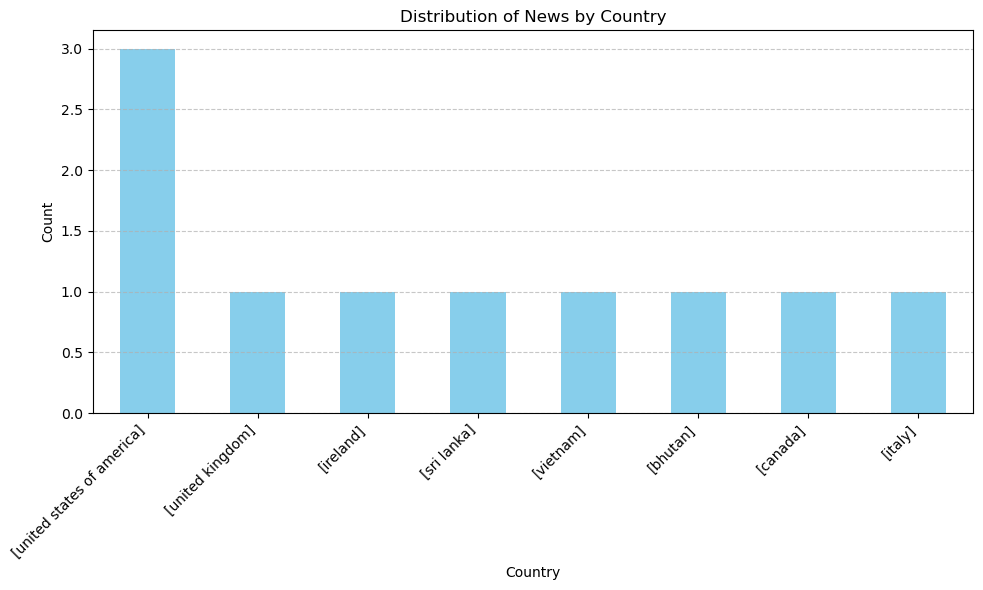

In [110]:
import matplotlib.pyplot as plt

# Count the occurrences of each country in the 'country' column
country_counts = news_df["country"].value_counts()

# Create a bar plot using matplotlib
plt.figure(figsize=(10, 6))  # Set the figure size
country_counts.plot(kind='bar', color='skyblue')  # Plot the bar chart of skyblue colour
plt.title('Distribution of News by Country')  # Set the title of the plot
plt.xlabel('Country')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Show the plot

#### Seaborn bar graph:

- Import the seaborn library __seaborn__ as __sns__ for plotting.
- We use __sns.barplot()__ to create a bar plot.
- __x__ is set to __country_names__ to specify the countries as the x-axis values.
- __y__ is set to __country_counts.values__ to specify the count of country names as the y-axis values.
- __palette__ is set to__pastel__ to use a pastel color palette for the bars.
- __plt.title()__, __plt.xlabel()__, and __plt.ylabel()__ are used to set the __title__, __x-label__, and __y-label__, respectively.
- __plt.xticks(rotation=45, ha='right')__ rotates the __x-axis__ labels by __45__ degrees for better readability.
- __plt.tight_layout()__ adjusts the layout to prevent clipping of labels.
- Finally, __plt.show()__ displays the plot.

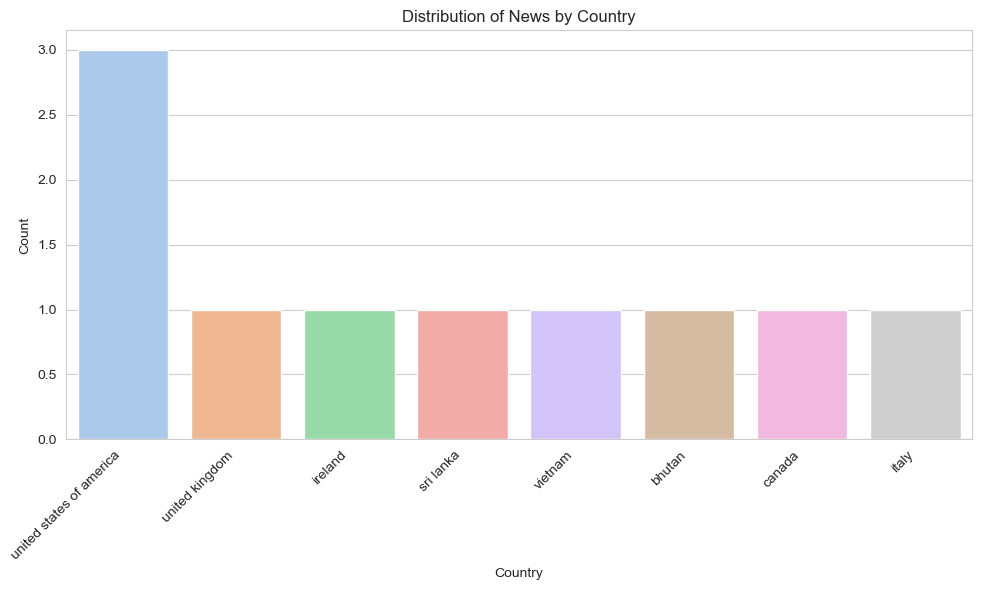

In [113]:
import seaborn as sns
#import matplotlib.pyplot as plt

# Convert index to list of strings
country_names = [', '.join(country) for country in country_counts.index]

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=country_names, y=country_counts.values, palette='pastel')  # Plot the bar chart
plt.title('Distribution of News by Country')  # Set the title of the plot using Matplotlib
plt.xlabel('Country')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Show the plot

### Inference:
> - Clearly, we can see from the bar chart developed countries are trying to take the lead in battle against Global warming and reporting it actively.
> - Small countries like Srilanka,Vietna and Bhutan are also trying there best to spread awareness about global warming through their news channels and articles.
> - The USA is the nation that provides most of the news worldwide regarding global warming.


### 2. Keyword frequency of  top 10 entries about Global Warming News articles 
> In this im trying to find which keyword most of the countries use in their news article to spread the awareness about the global warming.

#### Matplotlib bar graph:

- __explode()__ function in Pandas explodes the __keywords__ column in the DataFrame, which means converting each cell containing a list of keywords into multiple rows, each with a single keyword.
- __tolist()__ function converts the exploded Series of keywords into a Python list.
- __value_counts()__ function counts the frequency of each keyword from the list of pandas series.
- __plt.figure(figsize=(10, 6))__ creates a new Matplotlib figure with a specified size.
- Set the title of the plot using __plt.title()__.
- Set the labels for the x-axis and y-axis using __plt.xlabel()__ and __plt.ylabel()__ respectively.
- Rotate x-axis labels by __90 degrees__ for better readability using __plt.xticks(rotation=90)__.
- Finally, display the plot using __plt.show()__.

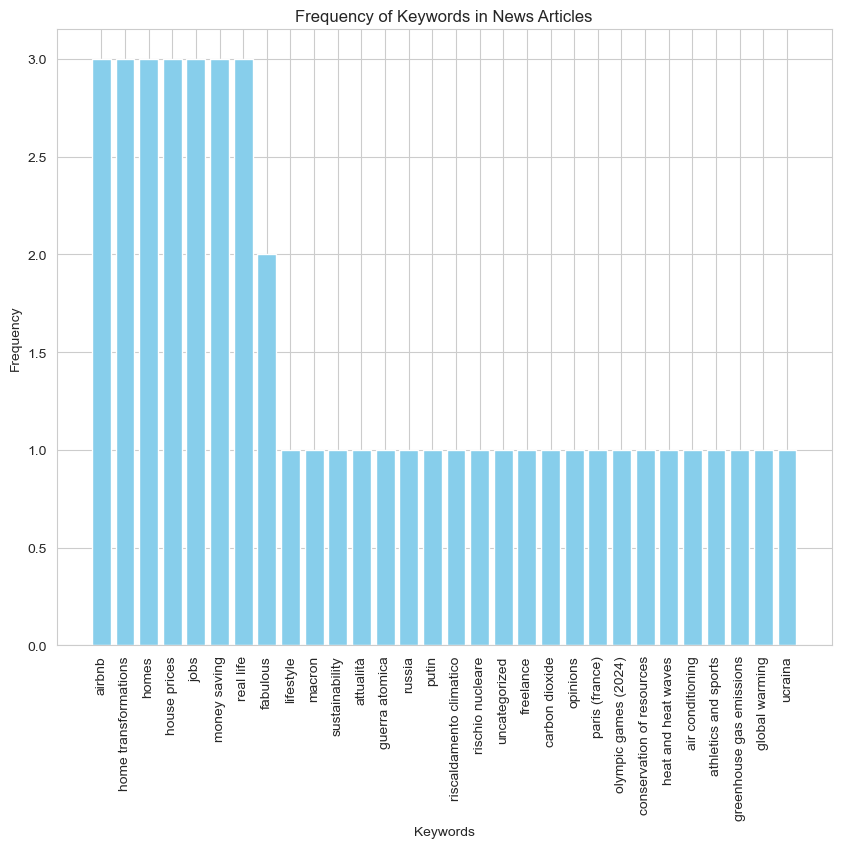

In [126]:
# Explode the "keywords" column and convert it into a list
keywords_list = news_df["keywords"].explode().tolist()

# Create a Pandas Series from the list of keywords and get their value counts
keyword_counts = pd.Series(keywords_list).value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 8))  # Set the figure size
plt.bar(keyword_counts.index, keyword_counts.values, color='skyblue')  # Plot the bar chart
plt.title('Frequency of Keywords in News Articles')  # Set the title of the plot
plt.xlabel('Keywords')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()  # Show the plot

#### Seaborn bar graph:

- __palette = sns.color_palette("icefire", as_cmap=True)__ This generates a color palette using the __icefire__ colormap. Setting __as_cmap=True__ ensures that the function returns a colormap object.
- __colors = [palette(i) for i in range(10)]__  This iterates over the colormap object (palette) to generate a list of colors. The range(10) specifies the number of colors needed.
- __sns.barplot(x=keyword_counts.index, y=keyword_counts.values, palette=colors)__  This creates a bar plot using seaborn's barplot() function. The palette argument specifies the color palette to be used for the bars.
- __plt.title()__, __plt.xlabel()__, and __plt.ylabel()__ are used to set the __title__, __x-label__, and __y-label__, respectively.
- __plt.xticks(rotation=90)__ rotates the __x-axis__ labels by __90__ degrees for better readability.
- __plt.tight_layout()__ adjusts the layout to prevent clipping of labels.
- Finally, __plt.show()__ displays the plot.

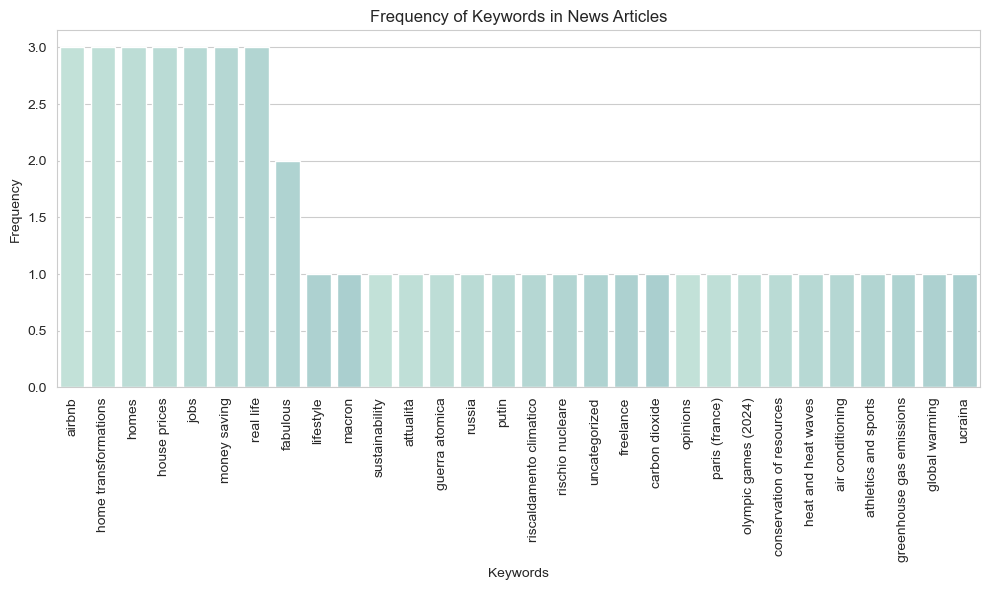

In [152]:
# Generate the color palette using light_palette and convert it to a list of colors
palette = sns.color_palette("icefire", as_cmap=True)
colors = [palette(i) for i in range(10)]  # Adjust the range according to the number of colors needed

# Create a bar plot using seaborn with the generated list of colors
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=keyword_counts.index, y=keyword_counts.values, palette=colors)  # Plot the bar chart with the generated palette
plt.title('Frequency of Keywords in News Articles')  # Set the title of the plot
plt.xlabel('Keywords')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Show the plot

### Inference:
> - Looking at the bar graph the words such as 'airbnb','home transformations','home prices','jobs' etc are not at all related to the global warming.
>- May be this is one of the strategies of the countries for bringing the audience attention towards this issue of global warming.
>- Most of the words are not related to the global warming issues.

### 3. Source sites that are contributing the most in Global Warming News space
> In this im trying to display the different sources ID through which the news are published.

- __source_counts = news_df["source_id"].value_counts()__ This calculates the frequency of each unique source ID in the "source_id" column using the __value_counts()__ function. 
- __plt.figure(figsize=(10, 8))__ This  creates a new figure with a specific size of 10 inches in width and 8 inches in height using __figure()__ function.
- __plt.bar(source_counts.index, source_counts.values, color='teal')__ This  plots the bar chart using the __bar()__ function of Matplotlib. It takes the index of __source_counts__ as the x-values (source IDs) and the values of __source_counts__ as the y-values (frequency). The bars are colored teal using the color parameter.
- __plt.title('Frequency of News Sources')__ This sets the title of the plot to __Frequency of News Sources__ using the __title()__ function.
- Set the labels for the x-axis and y-axis using __plt.xlabel()__ and __plt.ylabel()__ respectively.
- Rotate x-axis labels by __90 degrees__ for better readability using __plt.xticks(rotation=90)__.
- Finally, display the plot using __plt.show()__.

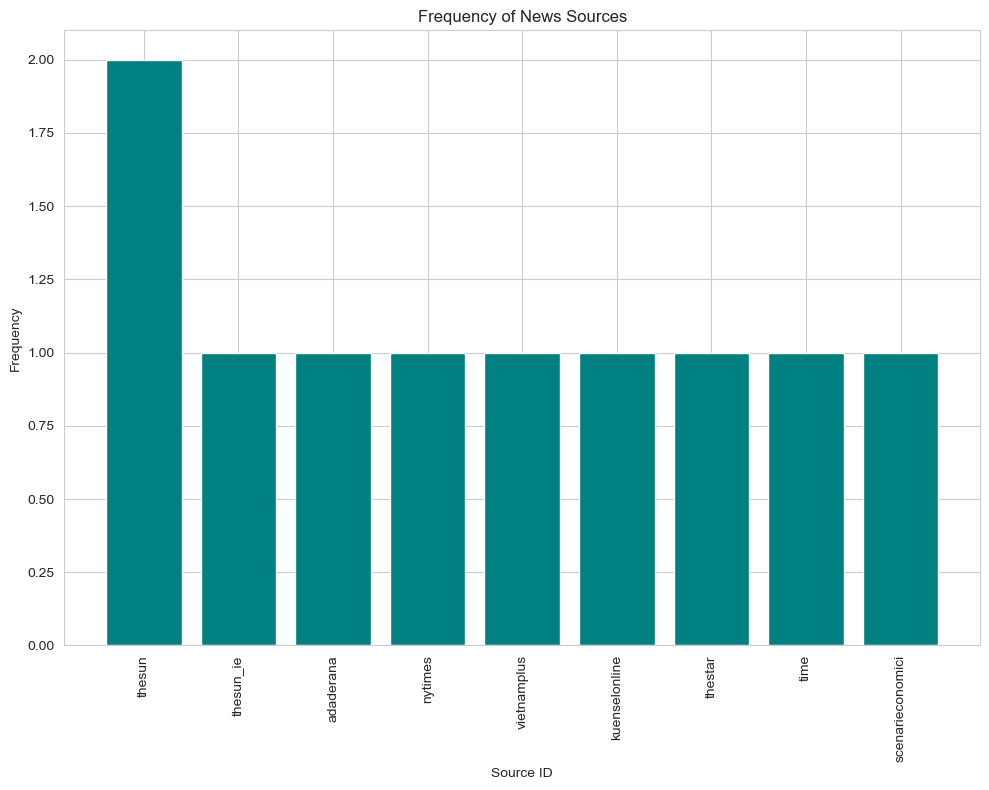

In [160]:
# Get the value counts of source_id column
source_counts = news_df["source_id"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 8))  # Set the figure size
plt.bar(source_counts.index, source_counts.values, color='teal')  # Plot the bar chart
plt.title('Frequency of News Sources')  # Set the title of the plot
plt.xlabel('Source ID')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Show the plot

#### Seaborn bar graph:

- __palette =sns.diverging_palette(220, 20, as_cmap=True)__ This generates a color palette using the __diverging_palette__ colormap. Setting __as_cmap=True__ ensures that the function returns a colormap object.
- __colors = [palette(i) for i in range(10)]__  This iterates over the colormap object (palette) to generate a list of colors. The range(10) specifies the number of colors needed.
- __sns.barplot(x=source_counts.index, y=source_counts.values, palette=colors)__  This creates a bar plot using seaborn's barplot() function. The palette argument specifies the color palette to be used for the bars.
- __plt.title()__, __plt.xlabel()__, and __plt.ylabel()__ are used to set the __title__, __x-label__, and __y-label__, respectively.
- __plt.xticks(rotation=90)__ rotates the __x-axis__ labels by __90__ degrees for better readability.
- __plt.tight_layout()__ adjusts the layout to prevent clipping of labels.
- Finally, __plt.show()__ displays the plot.

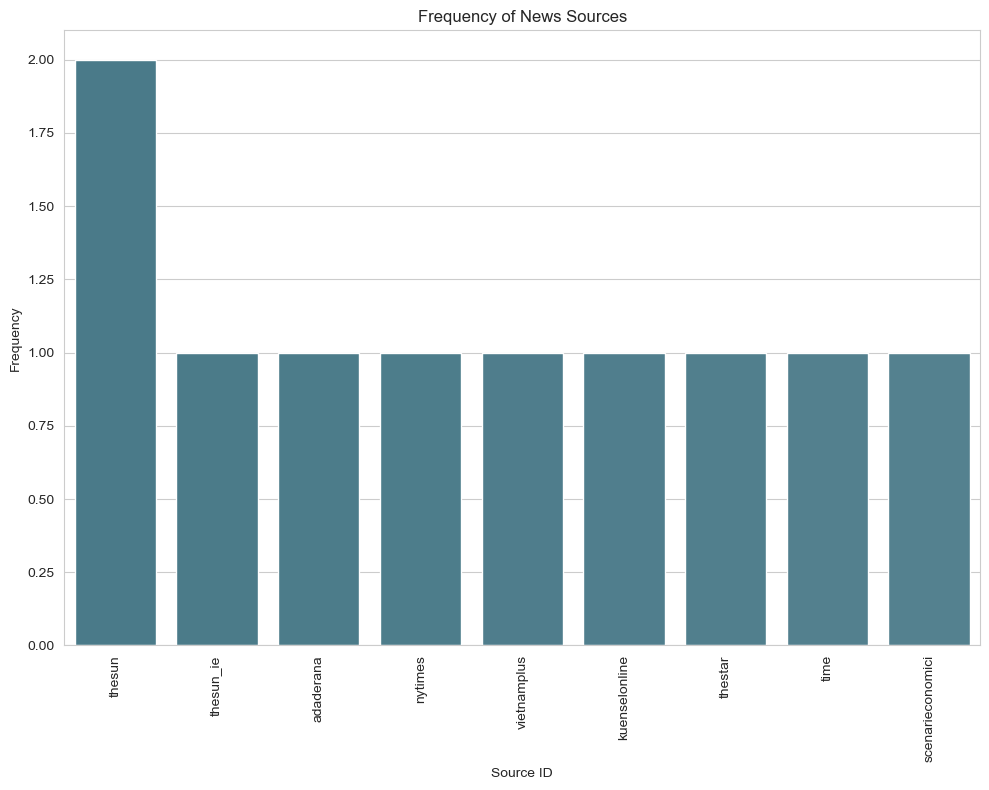

In [163]:
# Generate the color palette using light_palette and convert it to a list of colors
palette = sns.diverging_palette(220, 20, as_cmap=True)
colors = [palette(i) for i in range(10)]  # Adjust the range according to the number of colors needed

# Create a bar plot using seaborn with the generated list of colors
plt.figure(figsize=(10, 8))  # Set the figure size
sns.barplot(x=source_counts.index, y=source_counts.values, palette=colors)  # Plot the bar chart with the generated palette
plt.title('Frequency of News Sources')  # Set the title of the plot
plt.xlabel('Source ID')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Show the plot

### Inference:
> - Looking at the bar graph the we can say that __thesun__ source released most number of articles about the global warming.
>- One of the source is the local source for that particular country such as __vietnamplus__ is the source id for the __vietnam__.

### Thank You
### *- FNU NIKKAT AFRIN*